# **Jacob Shearer - Final Exam**

In [31]:
import numpy as np
import scipy as sp
from scipy.stats import qmc
import matplotlib.pyplot as plt
from matplotlib.cm import ScalarMappable
import random

**Question 1:**

I'm going to use 2D quasi-monte carlo integration for this problem. Error for quasi-monte carlo integration over $D$ dimensions scales like so:
</br>
</br>
$$ \sigma_{qmc} = \frac{1}{N}$$
</br>
where $N$ is the total number of points used in the integration. Therefore, to achieve six significant figures of predicted accuracy (an error of $1\cdot10^{-7}$ to be safe), we would need:
</br>
</br>
$$N = \frac{1}{\sigma_{qmc}} = \frac{1}{1 \cdot10^{-7}} = 1\cdot 10^{7}$$

In [55]:
def truncator(array, places):
    new_array = np.zeros(len(array))
    for i in range(len(array)):
        new_array[i] = float(f'%.{places}f' % array[i])
    
    return new_array

def integrand(x, y):
    # the constants out front become one when rho = 4 pi eps_0
    denom = np.sqrt((x - xp)**2 + (y - yp)**2)
    return 1/denom

In [50]:
def integration_qMC_2d(integrand, a1, b1, a2, b2, N):
    int_sum = 0
    halton_sampler = qmc.Halton(d=2, scramble=True)
    x_halton = halton_sampler.random(N)
    for i in range(N):
        x = x_halton[i,0]*(b1-a1) + a1
        y = x_halton[i,1]*(b2-a2) + a2
        int_sum += integrand(x, y)
    result = (b2 - a2) * (b1 - a1) * int_sum/N
    return result

In [51]:
N = int(1e7)

x_p = np.array([2, 4, 6, 8, 10])
y_p = np.array([2, 4, 6, 8, 10])
phi = np.zeros((5, 5))
for i in range(len(x_p)):
    xp = x_p[i]
    for j in range(len(y_p)):
        yp = y_p[j]
        integrals = integration_qMC_2d(integrand, -1, 1, -1, 1, N)
        phi[i, j] = integrals

Phi(x_p, y_p):
x_p=10  0.39286  0.371927 0.343421 0.312668 0.28308  
x_p=8   0.486261 0.448154 0.400675 0.354019 0.312668 
x_p=6   0.63511  0.556518 0.472517 0.400675 0.343421 
x_p=4   0.902178 0.710954 0.556518 0.448154 0.371927 
x_p=2   1.449395 0.902178 0.63511  0.486261 0.39286  
        y_p=2    y_p=4    y_p=6    y_p=8    y_p=10




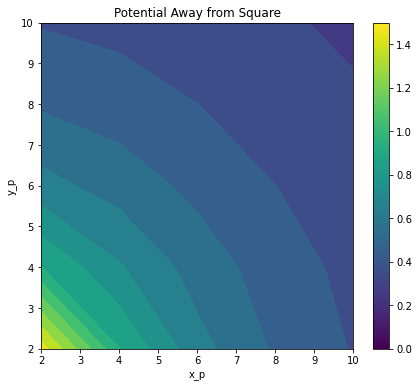

In [61]:
phi_reversed = phi[::-1]
print('Phi(x_p, y_p):')
print(f'x_p=10 {truncator(phi_reversed[0], 6)}'.replace('[', ' ').replace(']', ' '))
print(f'x_p=8  {truncator(phi_reversed[1], 6)}'.replace('[', ' ').replace(']', ' '))
print(f'x_p=6  {truncator(phi_reversed[2], 6)}'.replace('[', ' ').replace(']', ' '))
print(f'x_p=4  {truncator(phi_reversed[3], 6)}'.replace('[', ' ').replace(']', ' '))
print(f'x_p=2  {truncator(phi_reversed[4], 6)}'.replace('[', ' ').replace(']', ' '))
print('        y_p=2    y_p=4    y_p=6    y_p=8    y_p=10')
print('\n')

fig, ax = plt.subplots(figsize=(7, 6))
qcs = ax.contourf(x_p, y_p, phi, levels=np.arange(0, 1.6, 0.1))
ax.set_xlabel('x_p')
ax.set_ylabel('y_p')
ax.set_title('Potential Away from Square')
fig.colorbar(ScalarMappable(norm=qcs.norm, cmap=qcs.cmap))
plt.show()

**Question 2:**